# Import libraries

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from collections import Counter
import numpy as np

In [4]:
df = pd.read_excel('preprocessed_data.xlsx')

In [5]:
df

old_data  label  \
0       sài tốt, pin ngon, máy mạnh, màn hình không t...      1   
1       đẹp, nhiều chức năng bảo mật rất hay. mua dùm...      1   
2      0 biết có phải do tương thích, mà máy ASUS X40...      2   
3      0 sao \nbiết trước là sẽ hỏng trong 1 khoảng t...      0   
4      1 bên không nghe được bao nhiêu dù đã chỉnh rồ...      0   
...                                                  ...    ...   
16827  ừ thì tiền nào của nấy, rẻ thì không chất lượn...      2   
16828  Ừm....nói chung xài tốt, chơi game cũng được, ...      0   
16829  ừnggggggggffffffffgbsbsbsnsn nói chung là ưng ...      1   
16830  ✌️ sản phẩm ngon hơn những gì mình tưởng tượng...      1   
16831  ☝️Tạm ổn... Nhưng tg xài lâu dài k biết sao.. ...      0   

                                           tranform_data  
0       sài tốt pin ngon máy mạnh màn_hình không thời...  
1       đẹp nhiều chức_năng bảo_mật rất hay mua dùm c...  
2      0 biết có phải do tương_thích mà máy asus x407...  
3      0 sao biết trước là sẽ hỏng trong 1 khoảng thờ...  
4      1 bên không nghe được bao_nhiêu dù đã chỉnh rồ...  
...                                                  ...  
16827  ừ thì tiền nào của nấy rẻ thì không chất_lượng...  
16828  ừm nói_chung xài tốt chơi game cũng được chụp ...  
16829  ừnggggggggffffffffgbsbsbsnsn nói_chung là ưng ...  
16830  ️ sản_phẩm ngon hơn những gì mình tưởng_tượng ...  
16831  ️ tạm ổn nhưng tg xài lâu_dài k biết sao 300k ...  

[16832 rows x 3 columns]

In [6]:
def relabel(row):
    if row['label'] in [1, 2]:
        return 'Tích cực'
    elif row['label'] in [3, 4]:
        return 'Trung tính'
    elif row['label'] in [0, 5]:
        return 'Tiêu cực'

# Áp dụng hàm gán nhãn mới cho từng dòng
df['new_label'] = df.apply(relabel, axis=1)
# Drop cột label cũ
df.drop('label', axis=1, inplace=True)
# Hiển thị dữ liệu sau khi gán nhãn lại
print(df[['tranform_data', 'new_label']])

                                           tranform_data new_label
0       sài tốt pin ngon máy mạnh màn_hình không thời...  Tích cực
1       đẹp nhiều chức_năng bảo_mật rất hay mua dùm c...  Tích cực
2      0 biết có phải do tương_thích mà máy asus x407...  Tích cực
3      0 sao biết trước là sẽ hỏng trong 1 khoảng thờ...  Tiêu cực
4      1 bên không nghe được bao_nhiêu dù đã chỉnh rồ...  Tiêu cực
...                                                  ...       ...
16827  ừ thì tiền nào của nấy rẻ thì không chất_lượng...  Tích cực
16828  ừm nói_chung xài tốt chơi game cũng được chụp ...  Tiêu cực
16829  ừnggggggggffffffffgbsbsbsnsn nói_chung là ưng ...  Tích cực
16830  ️ sản_phẩm ngon hơn những gì mình tưởng_tượng ...  Tích cực
16831  ️ tạm ổn nhưng tg xài lâu_dài k biết sao 300k ...  Tiêu cực

[16832 rows x 2 columns]


# Phân Phối Nhãn

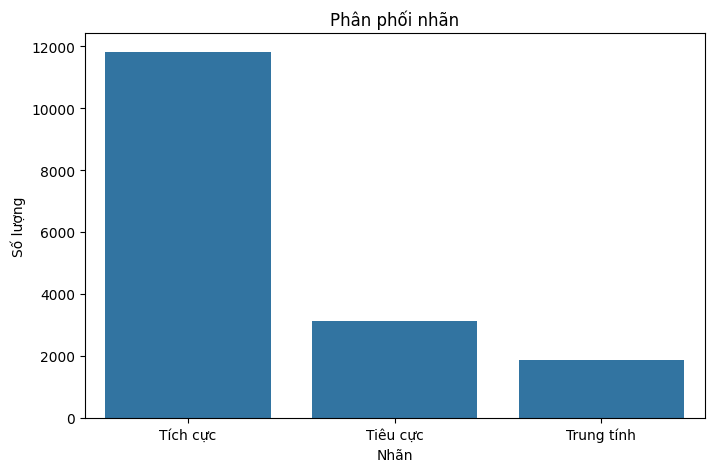

In [7]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='new_label', order=df['new_label'].value_counts().index)
plt.title('Phân phối nhãn')
plt.xlabel('Nhãn')
plt.ylabel('Số lượng')
plt.show()

# Biểu đồ chiều dài câu

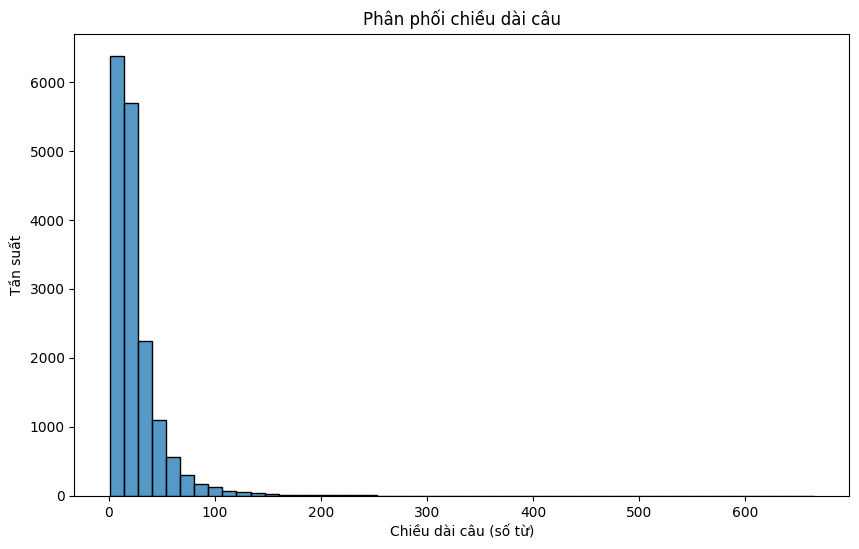

In [8]:
df['sentence_length'] = df['tranform_data'].apply(lambda x: len(x.split()))

plt.figure(figsize=(10, 6))
sns.histplot(df['sentence_length'], bins=50)
plt.title('Phân phối chiều dài câu')
plt.xlabel('Chiều dài câu (số từ)')
plt.ylabel('Tần suất')
plt.show()

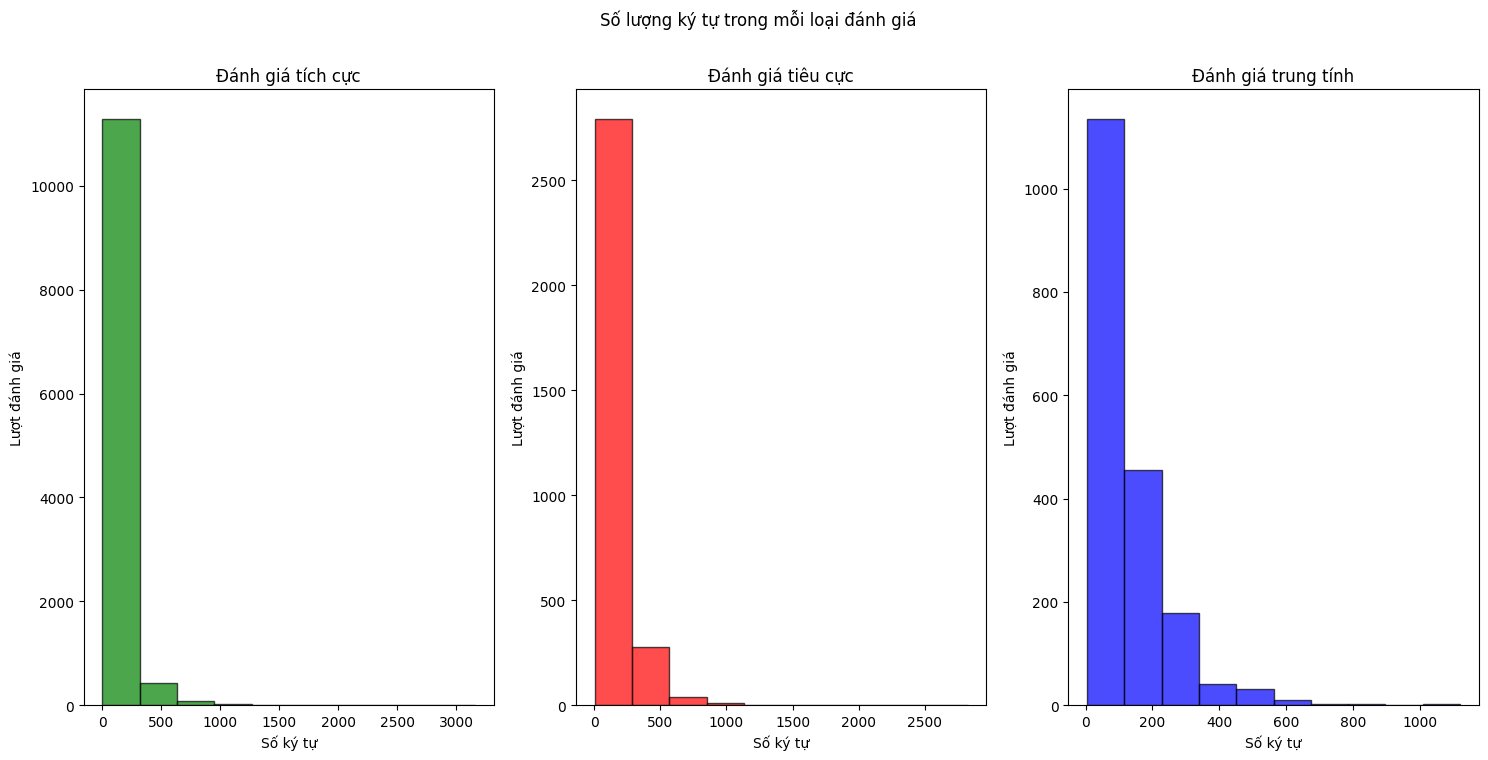

In [9]:
# Tách dữ liệu cho từng loại đánh giá
positive_data = df[df['new_label'] == 'Tích cực']['tranform_data']
negative_data = df[df['new_label'] == 'Tiêu cực']['tranform_data']
neutral_data = df[df['new_label'] == 'Trung tính']['tranform_data']

# Tạo subplots
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 8))

# Vẽ histogram cho đánh giá tích cực
text_len_positive = positive_data.str.len()
ax1.hist(text_len_positive, color='green', edgecolor='black', alpha=0.7)
ax1.set_title('Đánh giá tích cực')
ax1.set_xlabel('Số ký tự')
ax1.set_ylabel('Lượt đánh giá')

# Vẽ histogram cho đánh giá tiêu cực
text_len_negative = negative_data.str.len()
ax2.hist(text_len_negative, color='red', edgecolor='black', alpha=0.7)
ax2.set_title('Đánh giá tiêu cực')
ax2.set_xlabel('Số ký tự')
ax2.set_ylabel('Lượt đánh giá')

# Vẽ histogram cho đánh giá trung tính
text_len_neutral = neutral_data.str.len()
ax3.hist(text_len_neutral, color='blue', edgecolor='black', alpha=0.7)
ax3.set_title('Đánh giá trung tính')
ax3.set_xlabel('Số ký tự')
ax3.set_ylabel('Lượt đánh giá')

# Tiêu đề chung
fig.suptitle('Số lượng ký tự trong mỗi loại đánh giá')

# Hiển thị biểu đồ
plt.show()

### In ra top 10 từ phổ biến nhất trong bộ dữ liệu

In [10]:
corpus = ' '.join(df['tranform_data']).split()

# Đếm số lần xuất hiện của mỗi từ
counter = Counter(corpus)

# Lấy 10 từ xuất hiện nhiều nhất
most_common = counter.most_common(10)

# Chuyển đổi kết quả thành DataFrame
most_common_df = pd.DataFrame(most_common, columns=['corpus', 'count'])

# Hiển thị DataFrame
print(most_common_df)

  corpus  count
0   hàng   6438
1  không   5846
2    rất   5798
3    mua   5658
4    thì   5338
5    máy   4901
6     có   4836
7   mình   4556
8    tốt   4521
9   được   4520


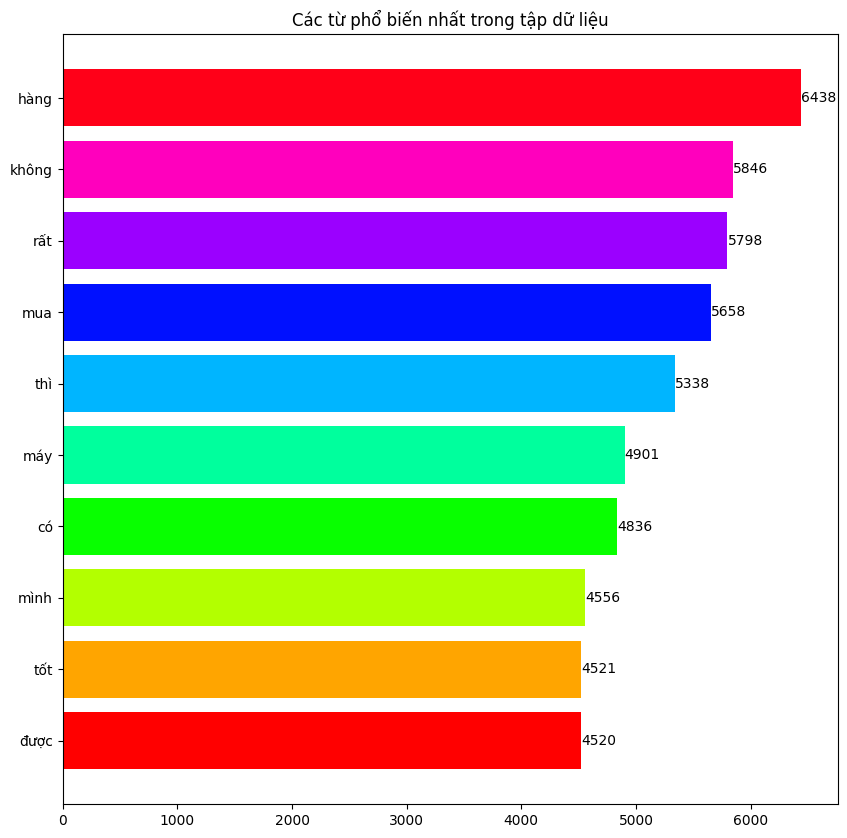

In [11]:
# Vẽ biểu đồ
plt.figure(figsize=(10, 10))
most_common_df = most_common_df.sort_values(by='count')
# Đặt nhãn cho trục y
plt.yticks(range(len(most_common_df)), most_common_df['corpus'])

# Tạo màu cho các thanh
colors = plt.cm.hsv(np.linspace(0, 1, len(most_common_df)))

# Vẽ biểu đồ nằm ngang
bars = plt.barh(range(len(most_common_df)), most_common_df['count'], align='center', color=colors)

# Tiêu đề cho biểu đồ
plt.title('Các từ phổ biến nhất trong tập dữ liệu')

# Thêm số lượng của từng từ vào các thanh trong biểu đồ
for bar, count in zip(bars, most_common_df['count']):
    plt.text(bar.get_width(), bar.get_y() + bar.get_height() / 2, count, ha='left', va='center')

# Hiển thị biểu đồ
plt.show()


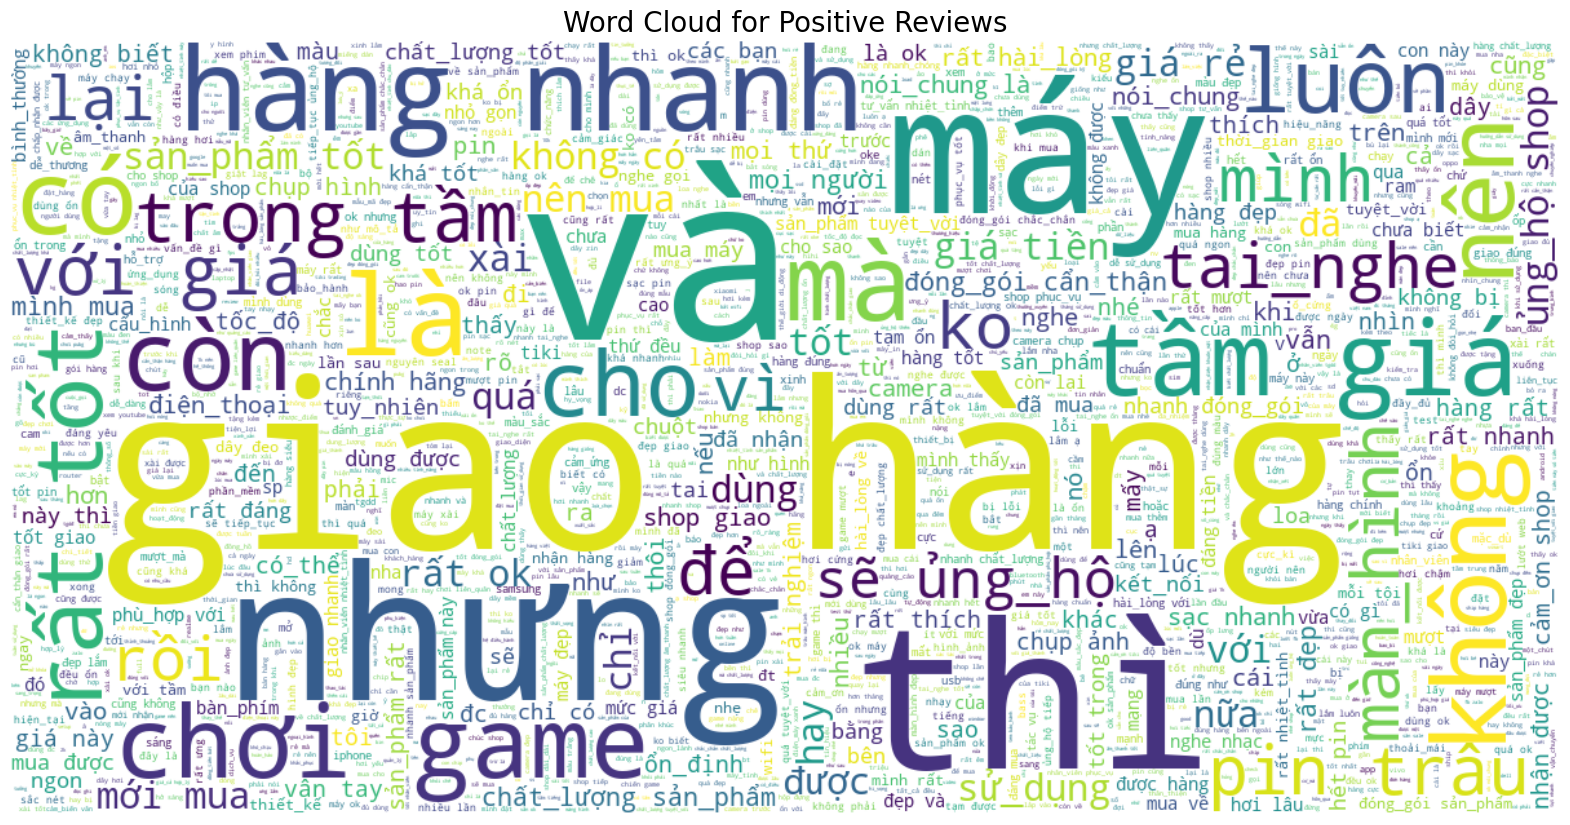

In [12]:
# Lọc dữ liệu tích cực
positive_data = df[df['new_label'] == 'Tích cực']['tranform_data']

# Kết hợp tất cả các đánh giá tích cực thành một chuỗi duy nhất
positive_data_string = ' '.join(positive_data)

# Tạo Word Cloud từ chuỗi văn bản các đánh giá tích cực
plt.figure(figsize=(20, 20))
wc = WordCloud(max_words=2000, width=1200, height=600, background_color="white").generate(positive_data_string)
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Positive Reviews', fontsize=20)
plt.show()

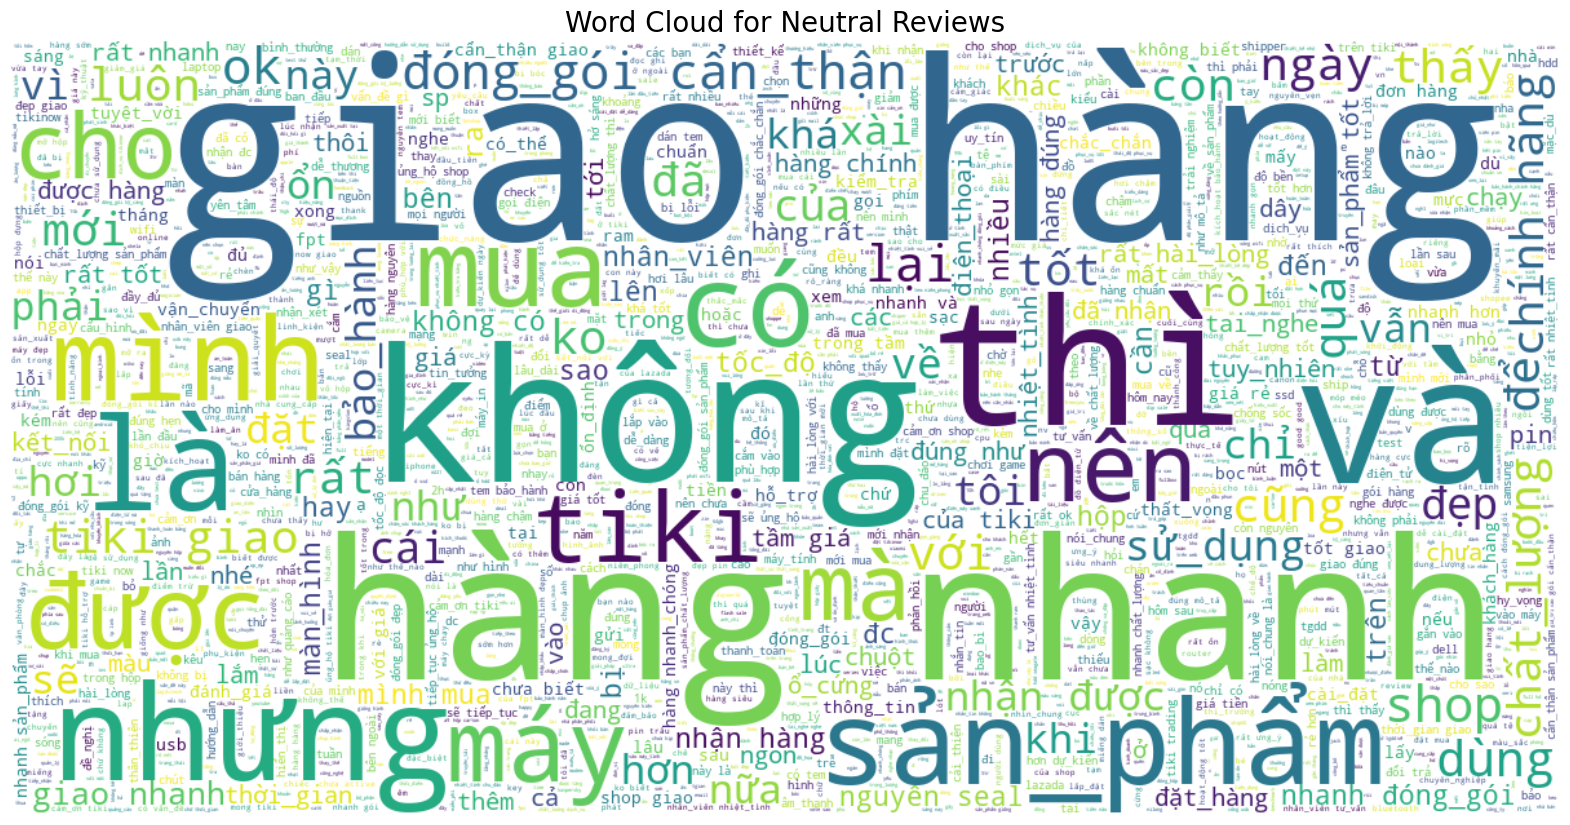

In [13]:
# Lọc dữ liệu trung tính
neutral_data = df[df['new_label'] == 'Trung tính']['tranform_data']

# Kết hợp tất cả các đánh giá trung tính thành một chuỗi duy nhất
neutral_data_string = ' '.join(neutral_data)

# Tạo Word Cloud cho dữ liệu trung tính
plt.figure(figsize=(20, 20))
wc_neutral = WordCloud(max_words=2000, width=1200, height=600, background_color="white").generate(neutral_data_string)
plt.imshow(wc_neutral, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Neutral Reviews', fontsize=20)
plt.show()

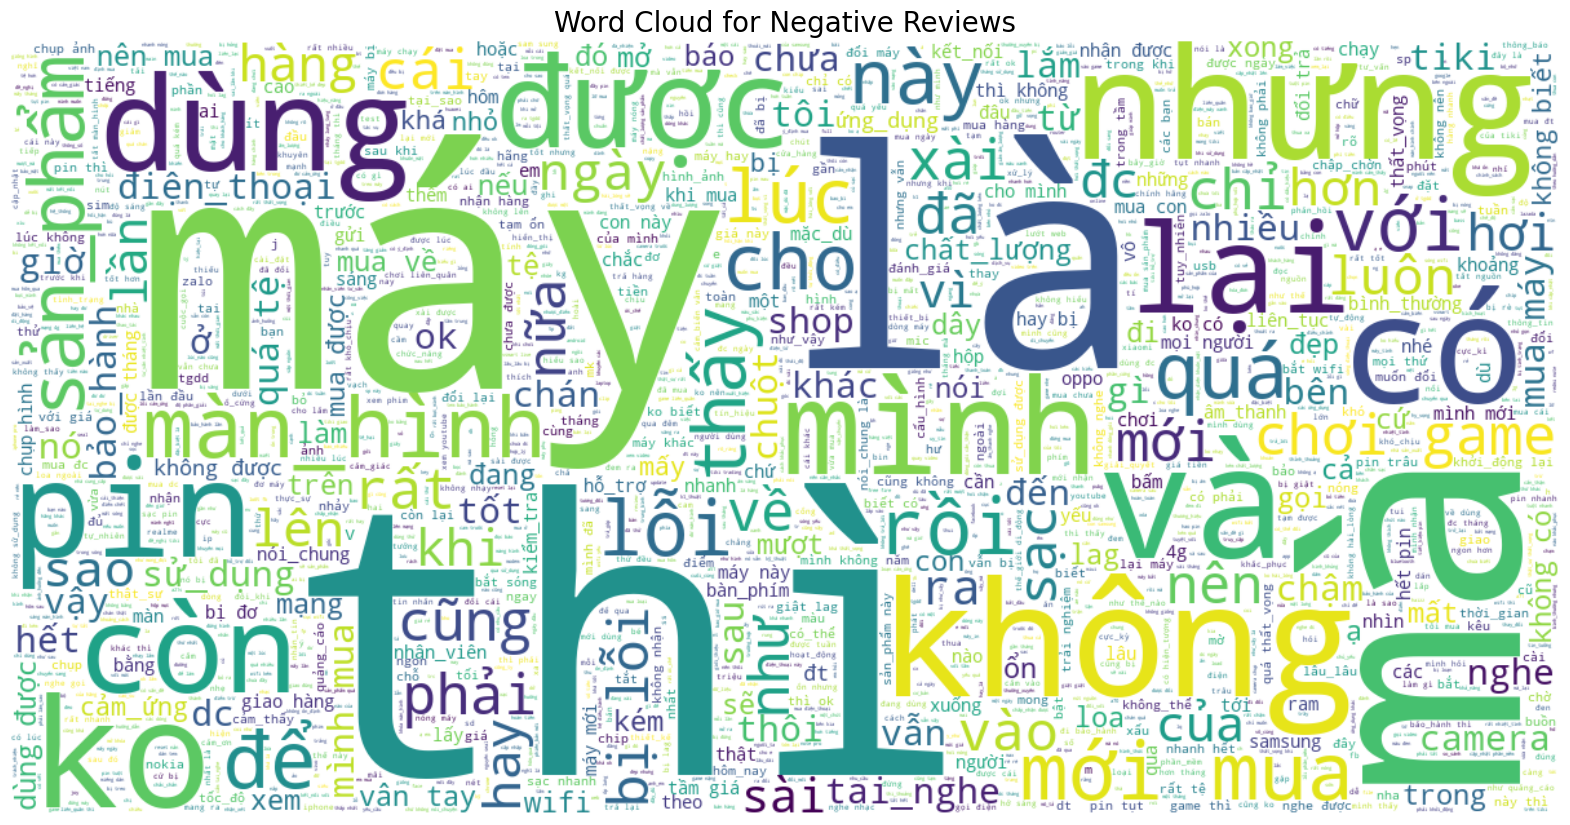

In [14]:
# Lọc dữ liệu trung tính và tiêu cực
negative_data = df[df['new_label'] == 'Tiêu cực']['tranform_data']

# Kết hợp tất cả các đánh giá tiêu cực thành một chuỗi duy nhất
negative_data_string = ' '.join(negative_data)

# Tạo Word Cloud cho dữ liệu tiêu cực
plt.figure(figsize=(20, 20))
wc_negative = WordCloud(max_words=2000, width=1200, height=600, background_color="white").generate(negative_data_string)
plt.imshow(wc_negative, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Negative Reviews', fontsize=20)
plt.show()

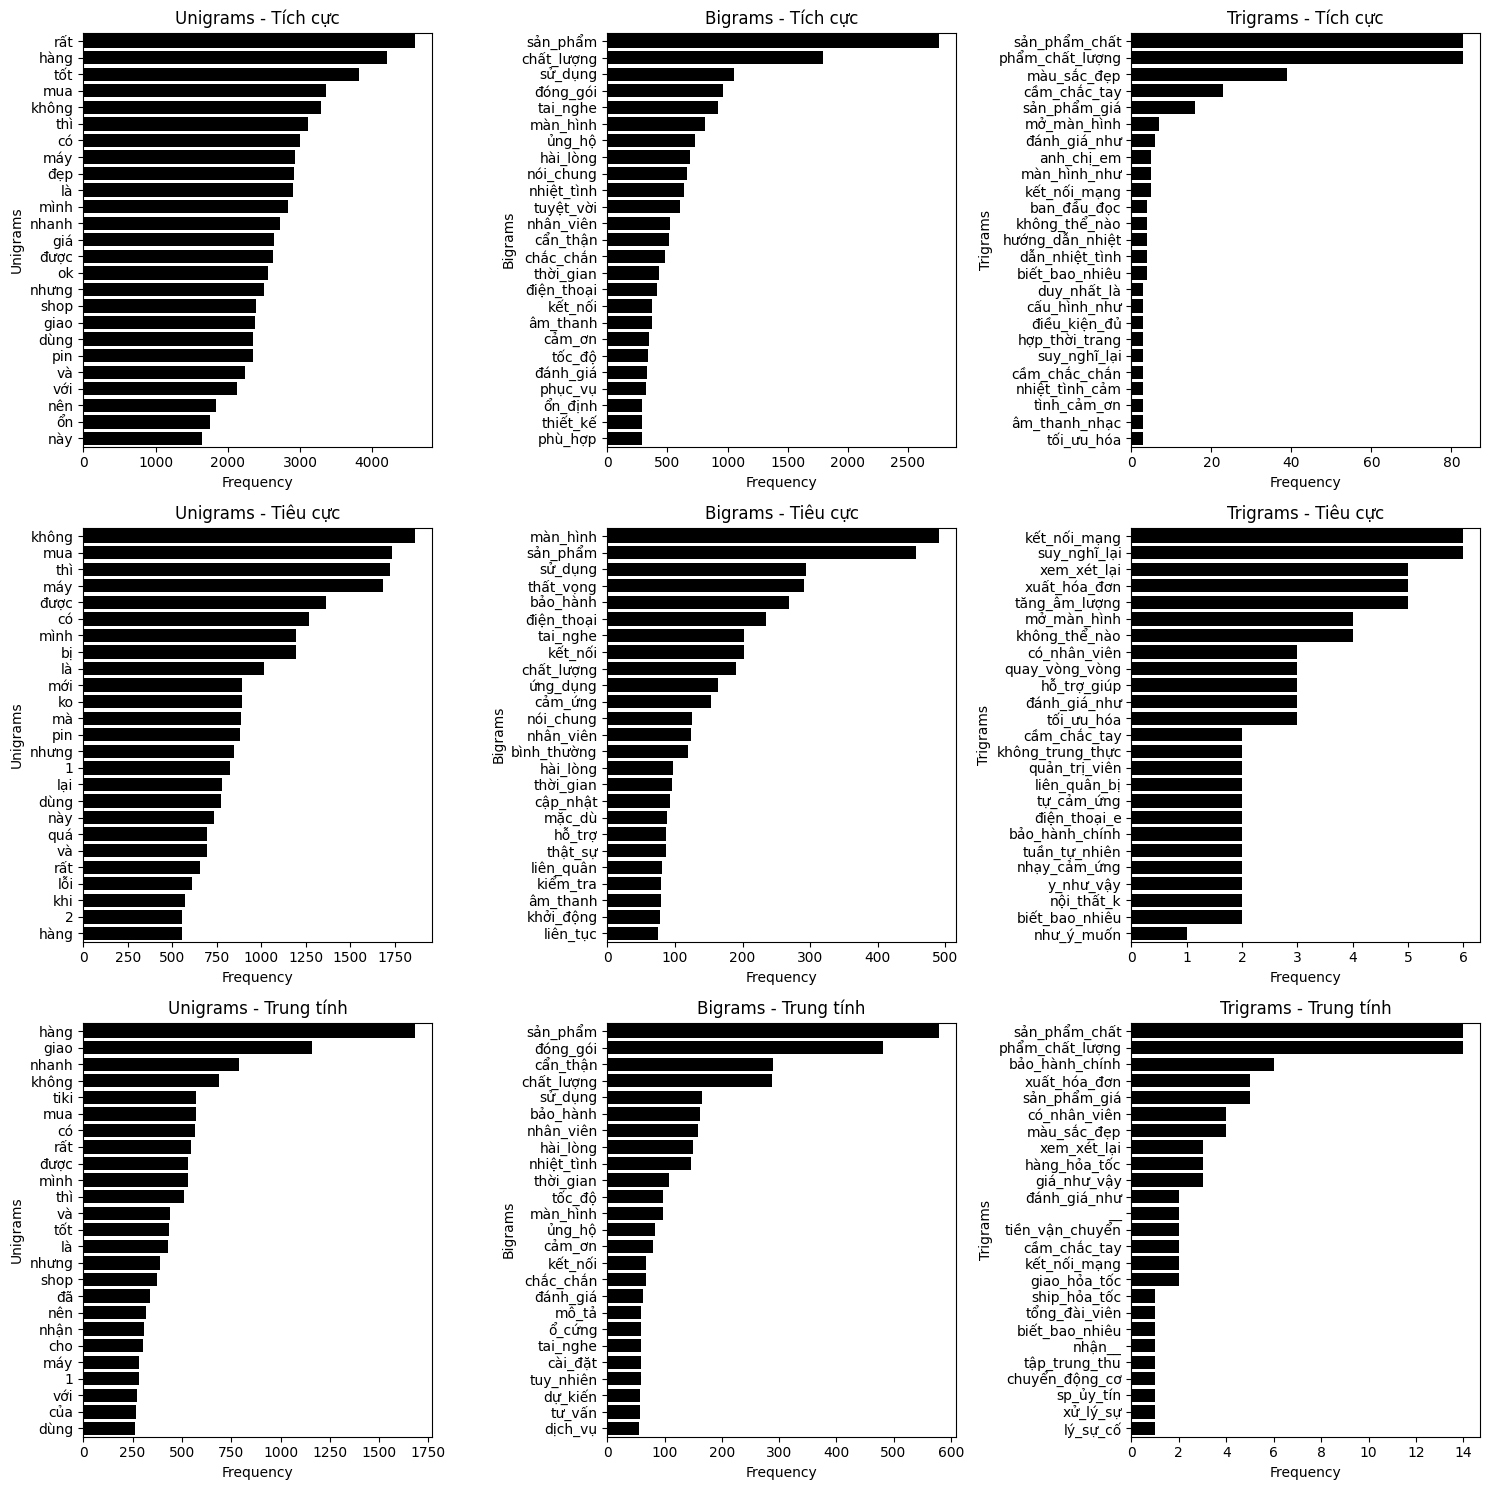

In [15]:
# Tạo Unigram
def create_unigrams(text_series: pd.Series):
    unigrams = []
    for text in text_series:
        words = text.split()  
        unigrams.extend([word for word in words if word and '_' not in word])  
    return unigrams

# Tạo Bigram
def create_bigrams(text_series: pd.Series):
    bigrams = []
    for text in text_series:
        phrases = text.split()
        for phrase in phrases:
            words = phrase.split('_')
            if len(words) > 1:
                bigrams.extend(['_'.join(words[i:i+2]) for i in range(len(words)-1)])  
    return bigrams

# Tạo Trigram (nếu cần)
def create_trigrams(text_series: pd.Series):
    trigrams = []
    for text in text_series:
        phrases = text.split()
        for phrase in phrases:
            words = phrase.split('_')
            if len(words) > 2:
                trigrams.extend(['_'.join(words[i:i+3]) for i in range(len(words)-2)])  
    return trigrams

# Hàm để lấy và vẽ Unigram, Bigram, Trigram cho từng loại nhãn
def analyze_sentiments(df: pd.DataFrame):
    labels = ['Tích cực', 'Tiêu cực', 'Trung tính']
    n_labels = len(labels)
    
    # Tạo không gian vẽ
    fig, axs = plt.subplots(n_labels, 3, figsize=(15, 15))  # 3 cột cho Unigram, Bigram, Trigram

    for i, label in enumerate(labels):
        filtered_data = df[df['new_label'] == label]['tranform_data']
        
        # Lấy Unigram và vẽ
        uni_word_list = create_unigrams(filtered_data)
        uni_word_freq = Counter(uni_word_list).most_common(25)

        uni_word, uni_freq = zip(*uni_word_freq)
        uni_word = list(uni_word)
        uni_freq = list(uni_freq)

        sns.barplot(x=uni_freq, y=uni_word, color='black', ax=axs[i, 0])
        axs[i, 0].set_title(f'Unigrams - {label}')
        axs[i, 0].set_xlabel('Frequency')
        axs[i, 0].set_ylabel('Unigrams')

        # Lấy Bigram và vẽ
        bi_word_list = create_bigrams(filtered_data)
        bi_word_freq = Counter(bi_word_list).most_common(25)

        bi_word, bi_freq = zip(*bi_word_freq)
        bi_word = list(bi_word)
        bi_freq = list(bi_freq)

        sns.barplot(x=bi_freq, y=bi_word, color='black', ax=axs[i, 1])
        axs[i, 1].set_title(f'Bigrams - {label}')
        axs[i, 1].set_xlabel('Frequency')
        axs[i, 1].set_ylabel('Bigrams')

        # Lấy Trigram và vẽ (nếu cần)
        tri_word_list = create_trigrams(filtered_data)
        tri_word_freq = Counter(tri_word_list).most_common(25)

        tri_word, tri_freq = zip(*tri_word_freq)
        tri_word = list(tri_word)
        tri_freq = list(tri_freq)

        sns.barplot(x=tri_freq, y=tri_word, color='black', ax=axs[i, 2])
        axs[i, 2].set_title(f'Trigrams - {label}')
        axs[i, 2].set_xlabel('Frequency')
        axs[i, 2].set_ylabel('Trigrams')

    plt.tight_layout()
    plt.show()

# Phân tích cho từng loại nhãn
analyze_sentiments(df)


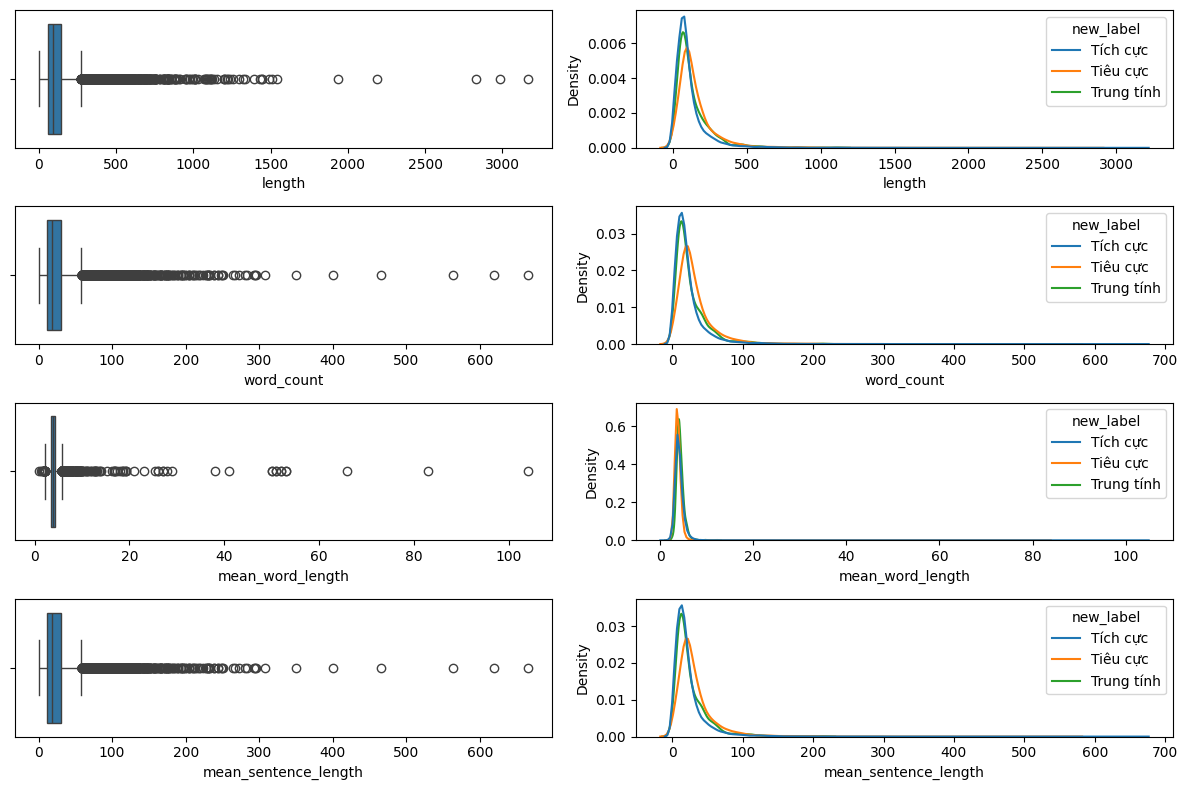

In [16]:
# Tính toán thêm các thuộc tính như trong ví dụ
df['length'] = df['tranform_data'].apply(len)
df['word_count'] = df['tranform_data'].apply(lambda x: len(x.split()))
df['mean_word_length'] = df['tranform_data'].apply(lambda x: np.mean([len(word) for word in x.split()]))
df['mean_sentence_length'] = df['tranform_data'].apply(lambda x: len(x.split())/len(x.split('.')) if '.' in x else len(x.split()))

# Vẽ lại biểu đồ với boxplot nằm ngang
plt.figure(figsize=(12, 8))

# Boxplot ngang và KDE cho từng cột
for i, column in enumerate(['length', 'word_count', 'mean_word_length', 'mean_sentence_length']):
    plt.subplot(4, 2, 2*i+1)
    sns.boxplot(x=column, data=df)  # Boxplot ngang
    plt.subplot(4, 2, 2*i+2)
    sns.kdeplot(data=df, x=column, hue='new_label', common_norm=False)

plt.tight_layout()
plt.show()
